# 다항 회귀(Polynomial Regression)

단순 선형 회귀
- 독립 변수 1개, 종속 변수 1개인 선형 회귀  
- 독립 변수(피처)와 종속 변수(타깃)의 관계가 일차 방정식 형태
-  $ y = w_0 + w_1X$

다중선형회귀 
- 독립 변수(피처)가 2개 이상인 선형 회귀   
- $ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{3} + ... + w_n X_{n} $
- 독립변수(festure)와 종속변수(target)의 관계가 일차방정식으로 표현된 회귀
- 직선으로 표현


다항 회귀 
- 회귀가 독립변수의 일차식이 아닌 2차식, 3차식 등 다항식으로 표현되는 회귀식 
-  $ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{1}X_{2} + w_4 X_{1}^2 + w_5 X_{2}^2 $
- 다항회귀도 선형회귀로 간주
    - 이유 
        - 선형회귀를 단순히 직선이나 곡선과 같은 모양으로 정의한 것이 아니라  
        - 선형/비선형 구분은 회귀 계수가 선형/비선형 여부에 따른 것이지  
          독립변수의 선형/비선형 여부와는 무관하기 때문
       - 즉, 새로운 변수 Z를 $ z=[X_{1} , X_{2} , X_{1}X_{2} , X_{1}^2, X_{2}^2 ] $ 라고 하면  
       - $ y = w_0 + w_1 Z_{1} + w_2 Z_{2} + w_3 Z_{3} + w_4 Z_{4} + w_5 Z_{5} $ 로 표현 가능   
- 피처 X에 대해 타깃 Y 값의 관계를 단순 선형회귀 직선형으로 표현한 것보다
- 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높음

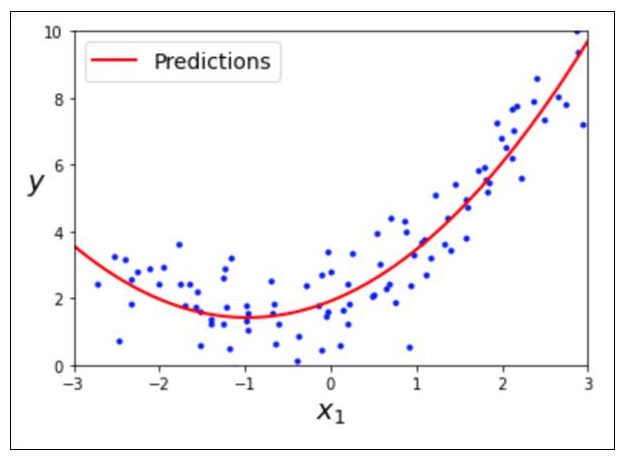

### 사이킷런에서 다항 회귀 사용 
- 사이킷런에서는 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음  
- 대신 비선형 함수를 선형 모델에 적용시키는 방법을 사용해서 구현  
- PolynomialFeatures 클래스를 사용해서 피처를 다항식 피처로 변환 

#### PolynomialFeatures 클래스
- PolynomialFeatures 클래스를 통해서 피처를 다항식 피처로 변환
- PolynomialFeatures(degree=2) : 2차 다항식
- fit()/transform() 메서드를 사용해서 변환 작업 수행
    - 또는 fit_transform() 메소드 사용  

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### PolynomialFeatures 클래스로 다항식 변환 예제 
- 단항값을 2차 다항값으로 변환하는 예
- 단항값 [$ x_1, x_2 $  ]을 2차 다항값 [$ 1, x_{1} , x_{2} , x_{1}^2, x_{1}x_{2} , x_{2}^2  $]으로 변환하는 예 

### 다항 회귀 구현 

In [4]:
# 단항식 생성
import numpy as np

X = np.arange(2).reshape(1,2)
print('일차 단항식 계수 피처 : ', X)

일차 단항식 계수 피처 :  [[0 1]]


In [8]:
# degree=2 일차 다항식 계수로 변환
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
poly_features.fit(X)
X_poly = poly_features.transform(X)

print('변환된 2차 다항식 계수 피처 : ', X_poly)

# transform(x1, x2) -> (1, x1, x2, x1^2, x1*x2, x2^2)
# [0, 1] -> [1. 0. 1. 0. 0. 1.]

변환된 2차 다항식 계수 피처 :  [[1. 0. 1. 0. 0. 1.]]


In [10]:
# 단항식 생성2
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처 : \n', X)

일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]


In [14]:
# degree=2인 2차 다항식 계수로 변환
poly_features = PolynomialFeatures(degree=2)
poly_features.fit(X)
X_poly = poly_features.transform(X)

print('변환된 2차 다항식 계수 피처 : ', X_poly)

# transform(x1, x2) -> (1, x1, x2, x1^2, x1*x2, x2^2)
# [[0 1] -> [1. 0. 1. 0. 0. 1.]
# [2 3]] -> [1. 2. 3. 4. 6. 9.]


변환된 2차 다항식 계수 피처 :  [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

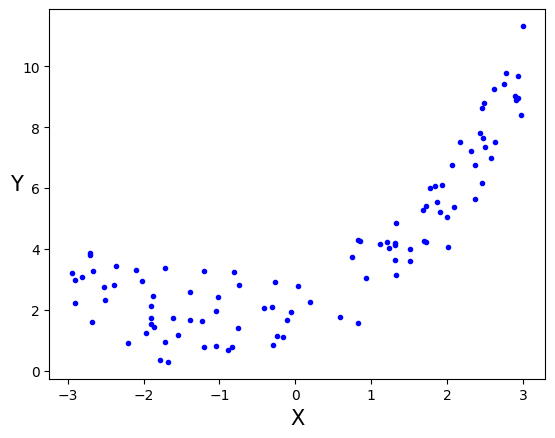

In [24]:
# 다항 회귀식을 그래프로 구현

# 임의의 데이터
n = 100
X = 6 * np.random.rand(n, 1) - 3  # 1 사이 100개 랜덤 숫자
y = 0.5 * X**2 + X + 2 + np.random.randn(n, 1)  # randn : 노이즈 더 주기

plt.plot(X, y, 'b.') # 모양 : .
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15, rotation=0)
plt.show()

In [28]:
# 피처를 다항식 피처로 변환

# include_bias = True : 디폴트, 절편 값으로 1이 추가됨 : 1 + ax + bx
poly_features = PolynomialFeatures(degree=2, include_bias = True)
X_poly =  poly_features.fit_transform(X)  
# fit_transform 은
# 아래 두개 합친거랑 같다.
# poly_features.fit(X)
# X_poly = poly_features.transform(X)


In [29]:
X_poly[:3]

array([[1.        , 2.43473868, 5.92795246],
       [1.        , 2.61069031, 6.81570388],
       [1.        , 2.37260438, 5.62925153]])

In [31]:
# include_bias = False :  ax + bx 절편값으로 1이 추가되지 않음
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly =  poly_features.fit_transform(X) 

In [33]:
X_poly[:3]

array([[2.43473868, 5.92795246],
       [2.61069031, 6.81570388],
       [2.37260438, 5.62925153]])

### 다항 회귀구현

In [34]:
# 선형 회귀 모델 생성/학습
from sklearn.linear_model import LinearRegression

line_reg = LinearRegression()
line_reg.fit(X_poly, y) # 다항식 피처 X_poly로 학습

LinearRegression()

In [50]:
# 비선형 선형 함수를 선형 회귀 모델에 적용
# 회귀식을 그리기 귀한 데이터 생성 : -3 ~ 3 범위에서 숫자 100개 동일 간격으로 생성
X_new = np.linspace(-3, 3, 100).reshape(100, 1)  # 100개를 1열로

# 피처를 다항식 피처로 변환
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_new_poly = poly_features.fit_transform(X_new)

# 예측
y_new = line_reg.predict(X_new_poly)

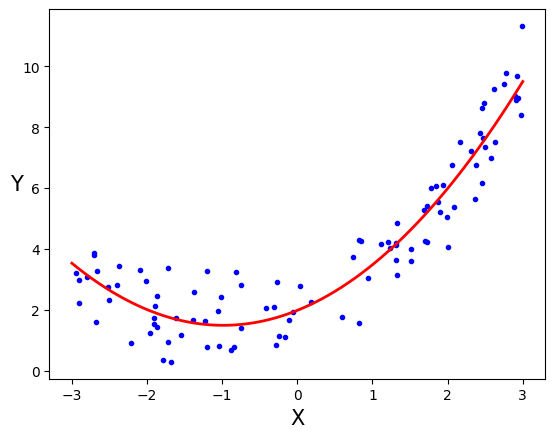

In [51]:
# 그래프로 출력
plt.plot(X, y, 'b.') # 모양 : .
plt.plot(X_new, y_new, 'r-', linewidth=2, label ='Predictions') # 모양 : -
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15, rotation=0)
plt.show()

## 다항 회귀를 이용한 보스턴 주택가격 예측

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

In [77]:

boston_df = df_pop = pd.read_csv('../../data/boston_dataset.csv', index_col=0) 
boston_df.head()
boston_df.tail()

print('보스턴 주택 가격 데이터셋 크기 : ', boston_df.shape)


보스턴 주택 가격 데이터셋 크기 :  (506, 14)


### 데이터 준비

In [78]:
# 타깃값 데이터 셋 만들기
y_target = boston_df['PRICE']

# 피처값 데이터 셋 만들기
# 타깃 제외한 나머지 칼럼들
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [79]:
X_data.shape
y_target.shape

(506,)

In [80]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_data , 
                                                       y_target, 
                                                       test_size=0.3, 
                                                       random_state=156)

###  PolynomialFeatures 변환과 LinearRegression을 순차적으로 결합 (3가지)
- Pipeline 이용   
(1) degree=2  
(2) degree=2, include_bias=False  
(3) degree=3, include_bias=False
- include_bias=True : default, 절편 값 1 추가

#### 사이킷런 Pipeline
- 피처 변환과 선형 회귀 적용을 별도로 하지 않고
- 다항 회기를 한 번에 구현하기 위한 방법  
- Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
# (1) degree=2

# Pipeline으로 수행한 모델 생성
# 'poly' : 첫 번째 스텝 이름 (변수명처럼 임의로 작성)
# 'linear' : 두 번째 스텝 이름


# Pipeline 모델 생성
p_model = Pipeline([('poly', PolynomialFeatures(degree=2)), # default : True
                   ('linear', LinearRegression())])
# 학습
p_model.fit(X_train, y_train)

# 예측
y_pred = p_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# 평가지표 출력
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R제곱 : {0:.3f}'.format(r2_score(y_test, y_pred)))

# 결과
# MSE : 24.282, RMSE : 4.928
# R제곱 : 0.659

MSE : 24.282, RMSE : 4.928
R제곱 : 0.659


In [89]:
# 회귀 계수 확인 : coef_ 속성
# print('Polynomial 회귀 계수 : ', np.round(p_model.named_steps['linear'].coef_, 2))

In [90]:
# (2) degree=2, include_bias=False

# Pipeline 모델 생성
p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), 
                   ('linear', LinearRegression())])
# 학습
p_model.fit(X_train, y_train)

# 예측
y_pred = p_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# 평가지표 출력
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R제곱 : {0:.3f}'.format(r2_score(y_test, y_pred)))

# 결과
# MSE : 15.556, RMSE : 3.944
# R제곱 : 0.782
# MSE, RMSE 낮아짐 = 수치가 좋아짐

MSE : 15.556, RMSE : 3.944
R제곱 : 0.782


In [92]:
# (3) degree=3, include_bias=False
# Pipeline 모델 생성
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)), 
                   ('linear', LinearRegression())])
# 학습
p_model.fit(X_train, y_train)

# 예측
y_pred = p_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# 평가지표 출력
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R제곱 : {0:.3f}'.format(r2_score(y_test, y_pred)))

# 결과
# MSE : 79625.593, RMSE : 282.180
# R제곱 : -1116.598
# 엉뚱한 수치

# degree = 3인경우 MSE, RMSE 급격히 상승하면서 overfitting 발생
# 과적합이 급격하게 진행하고 오차가 늘어나게 됨

# 다항 회귀의 단점 : 차수가 오르면서 과적합이 발생하기 쉽다.

MSE : 79625.593, RMSE : 282.180
R제곱 : -1116.598


In [93]:
# 결과 정리

# (1) degree=2
# MSE : 24.282, RMSE : 4.928
# R제곱 : 0.659

# (2) degree=2, include_bias=False
# MSE : 15.556, RMSE : 3.944
# R제곱 : 0.782


# (3) degree=3, include_bias=False
# MSE : 79625.593, RMSE : 282.180
# R제곱 : -1116.598

In [98]:
# 다항식에서 degree 크기 주의

# 다항식에서 변환 후 피처 수 확인
X_train_poly = PolynomialFeatures(degree=2, 
                                  include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

In [100]:
X_train_poly = PolynomialFeatures(degree=3, 
                                  include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 559), (354, 13))

In [ ]:
# 원본 데이터 피처 수 : 13
# 2차 다항식 변환 후 피처 수 : 104
# 3차 다항식 변환 후 피처 수 : 559
# 다항식 값이 높아질수록 피처수가 급격하게 늘어나면서 과적합이 급격하게 진행되고 오차가 늘어나게 됨
# 다항식 변환을 해서 사용할 때는 degree 에 대해 주의를 해야 함

### Polynomial Regression을 이용한 Underfitting, Overfitting 이해

다항 회귀를 이용한 과소적합 및 과(대)적합 이행
- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있지만
- 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춰진 학습이 이루어져 과적합 문제 발생